# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics: THIS IS A TEST! 

In [268]:
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [269]:
import numpy as np

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2


# Import your own code
import inauguralproject

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [270]:
#I think we can cut this cell, I'm just not sure if we need to define p2 somewhere

#def utility functions
def utility_A(x1A, x2A, alpha):
    return x1A**alpha * x2A**(1 - alpha)

def utility_B(x1B, x2B, beta):
    return x1B**beta * x2B**(1 - beta)

# Define demand functions
def demand_A(p1, p2, w1A, w2A, alpha):
    x1A = alpha *(p1 * w1A + p2 * w2A) / p1
    x2A = (1 - alpha) * (p1 * w1A + p2 * w2A) / p2
    return x1, x2

def demand_B(p1, p2, w1B, w2B, beta):
    x1B = beta * (p1 * w1B + p2 * w2B) / p1
    x2B = (1 - beta) * (p1 * w1B + p2 * w2B) / p2
    return x1, x2

# Define market equilibrium conditions
def market_clearing_condition(demand_A, demand_B, w1A, w2A, w1B, w2B):
    return (
        demand_A[0] + demand_B[0] - w1A - w1B,
        demand_A[1] + demand_B[1] - w2A - w2B)

# Calibration parameters
alpha = 1/3
beta = 2/3

# Numeraire
p2 = 1

In [271]:
from maritzatrying import ExchangeEconomyClass

# Question 1

**Explain how you solve the model**

In [272]:
model = ExchangeEconomyClass()

In [273]:
# code for solving the model (remember documentation and comments)

a = np.array([1,2,3])
b = inauguralproject.square(a)
print(b)

[1 4 9]


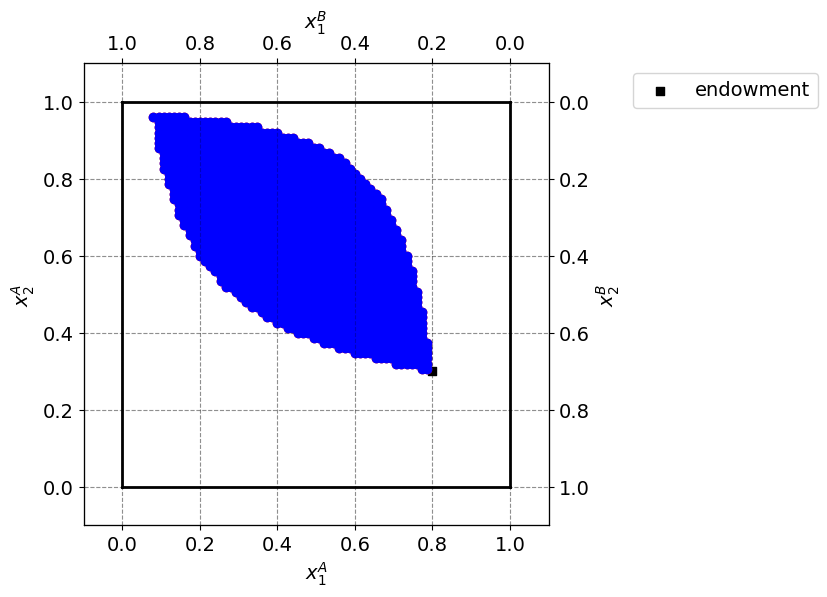

In [274]:
par = model.par

# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# A
ax_A.scatter(par.w1A,par.w2A,marker='s',color='black',label='endowment')

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0));

# Define initial endowments
omegaA1 = par.w1A
omegaA2 = par.w2A
omegaB1 = 1 - par.w1A
omegaB2 = 1 - par.w2A

# Generate grid of points
N = 75
xA1_values = np.linspace(0, 1, N+1)
xA2_values = np.linspace(0, 1, N+1)

# Initialize lists to store valid points
valid_points_A = []
valid_points_B = []

# Check each point
for xA1 in xA1_values:
    for xA2 in xA2_values:
        # Calculate corresponding B goods
        xB1 = 1 - xA1
        xB2 = 1 - xA2
        # Check if point satisfies conditions
        if utility_A(xA1, xA2, alpha) >= utility_A(omegaA1, omegaA2, alpha) and utility_B(xB1, xB2, beta) >= utility_B(omegaB1, omegaB2, beta):
            valid_points_A.append((xA1, xA2))
            valid_points_B.append((xB1, xB2))

# Plot valid points
ax_A.scatter([point[0] for point in valid_points_A], [point[1] for point in valid_points_A], marker='o', color='red', label='Valid points A')
ax_B.scatter([point[0] for point in valid_points_B], [point[1] for point in valid_points_B], marker='o', color='blue', label='Valid points B')


# Question 2

Calculate the error in the market

In [275]:
# Given values  
N=10
P1 = np.array([0.5+2*i/N for i in range (N+1)])
wA = np.array([1.0, 2.0])
wB = np.array([0.5, 1.5])

#Define functions for xA and xB
def xA (p,w):
    return np.array([p,p])* w

def xB (p,w):
    return np.array([p,p])* w

#Calculate error for each p1 in P1
for p1 in P1:
    #Calculate xA and xB
    xA_values = xA(p1,wA)
    xB_values = xB(p1,wB)

    #Calculate errors e_1 and e_2
    error_1 = np.sum(xA_values) - np.sum(wA) + np.sum(xB_values)-np.sum(wB)
    error_2 = np.sum(xA_values) - np.sum(wA) + np.sum(xB_values)-np.sum(wB)

    #Display results

    print(f"For p1={p1}:")
    print(f"e_1(p, w) = {error_1}")
    print(f"e_2(p, w) = {error_2}")
    print("---")

For p1=0.5:
e_1(p, w) = -2.5
e_2(p, w) = -2.5
---
For p1=0.7:
e_1(p, w) = -1.5000000000000004
e_2(p, w) = -1.5000000000000004
---
For p1=0.9:
e_1(p, w) = -0.4999999999999998
e_2(p, w) = -0.4999999999999998
---
For p1=1.1:
e_1(p, w) = 0.5000000000000004
e_2(p, w) = 0.5000000000000004
---
For p1=1.3:
e_1(p, w) = 1.5000000000000004
e_2(p, w) = 1.5000000000000004
---
For p1=1.5:
e_1(p, w) = 2.5
e_2(p, w) = 2.5
---
For p1=1.7:
e_1(p, w) = 3.5
e_2(p, w) = 3.5
---
For p1=1.9:
e_1(p, w) = 4.499999999999999
e_2(p, w) = 4.499999999999999
---
For p1=2.1:
e_1(p, w) = 5.500000000000001
e_2(p, w) = 5.500000000000001
---
For p1=2.3:
e_1(p, w) = 6.5
e_2(p, w) = 6.5
---
For p1=2.5:
e_1(p, w) = 7.5
e_2(p, w) = 7.5
---


In [276]:
#SECOND POSSIBLE VERSION:
#Not sure which one is correct because we get different results, let's wait for the others 

# Define the price set P1
N = 10
P1 = np.array([0.5+2*i/N for i in range (N+1)])

# Initialize lists to store errors
errors_1 = []
errors_2 = []

# Iterate over each price level in P1
for p1 in P1:
    # Calculate p2 based on numeraire condition
    p2 = 1.0
    
    # Calculate demanded quantities for both consumers
    xA1, xA2 = model.demand_A(p1, p2)
    xB1, xB2 = model.demand_B(p1, p2)
    
    # Calculate market clearing errors
    epsilon1 = xA1 - model.par.w1A + xB1 - (1 - model.par.w1A)
    epsilon2 = xA2 - model.par.w2A + xB2 - (1 - model.par.w2A)
    
    # Append errors to lists
    errors_1.append(epsilon1)
    errors_2.append(epsilon2)

# Print errors for each price level
for i, p1 in enumerate(P1):
    print(f"Price level p1 = {p1}: Error 1 = {errors_1[i]}, Error 2 = {errors_2[i]}")
    

Price level p1 = 0.5: Error 1 = 0.3999999999999999, Error 2 = -0.29999999999999993
Price level p1 = 0.7: Error 1 = 0.22857142857142854, Error 2 = -0.1399999999999999
Price level p1 = 0.9: Error 1 = 0.13333333333333314, Error 2 = 0.02000000000000013
Price level p1 = 1.1: Error 1 = 0.07272727272727281, Error 2 = 0.18000000000000038
Price level p1 = 1.3: Error 1 = 0.03076923076923077, Error 2 = 0.3400000000000003
Price level p1 = 1.5: Error 1 = -5.551115123125783e-17, Error 2 = 0.5000000000000002
Price level p1 = 1.7: Error 1 = -0.023529411764705854, Error 2 = 0.6600000000000004
Price level p1 = 1.9: Error 1 = -0.04210526315789459, Error 2 = 0.8200000000000005
Price level p1 = 2.1: Error 1 = -0.05714285714285716, Error 2 = 0.9800000000000004
Price level p1 = 2.3: Error 1 = -0.06956521739130445, Error 2 = 1.14
Price level p1 = 2.5: Error 1 = -0.08000000000000007, Error 2 = 1.3


# Question 3

What is market clearing price?

To get market clearing price we need to have both error terms == 0 <br>
Walras law: if one market clears also the other will <br>
Use iterative method to get the error very close to zero <br>
Look at notebook on random numbers example <br>

In [277]:
N = 1000 # number of agents
k = 2 # relative endowment of good 1
kappa = 0.1 # important to say how much the new p1 should change
maxiter=500 #max number of iteration
eps = 1e-8 #tolerance parameter for solving

dale = ExchangeEconomyClass()

p1_guess = 1.5
p2 = 1
dale.find_equilibrium(p1_guess,p2, N, k, kappa, eps, maxiter)

  0: p1 =   1.50000000 -> excess demand ->     0.00000000
The market for good 2 was not cleared
Z2 = 0.5000000000000004


In [278]:
dale.print_solution()

Solution to market equilibrium:
p1 = 1.500
p2 = 1.000

Excess demands are:
Z1 = 0.0
Z2 = 0.5000000000000004


In [279]:
print(dale.Z1,dale.Z2)
assert np.abs(dale.Z1) < eps
assert np.abs(dale.Z2) < eps

0.0 0.5000000000000004


AssertionError: 

# Question 4a

Assume that A chooses the price to maximize her own utility.

Find the allocation if only prices in P1 can be chosen

In [280]:
from types import SimpleNamespace
import numpy as np
from scipy import optimize

import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

In [281]:
# Define the number of points in the grid
N = 75

# Define the range of values for p1
P1 = np.array([0.5 + 2*i/N for i in range(N+1)])

# Initialize variables to store the best utility and corresponding p1 value
utility_best = -np.inf  # initial maximum
p1_best = np.nan  # not-a-number

# Iterate over each value of p1
for p1 in P1:
    # Calculate the utility for agent A using the given formula
    arguments = (1 - model.demand_B(p1, 1.0)[0], 1 - model.demand_B(p1, 1.0)[1])
    utility = model.utility_A(*arguments)
    
    # Update the best utility and corresponding p1 if the current utility is higher
    if utility > utility_best:
        utility_best = utility
        p1_best = p1
        best_arguments = arguments

# Print the result
print(f'Best utility is {utility_best:.8f} at p1 = {p1_best:.8f}')
print(f'Arguments of utility function at the best point: {best_arguments}')

Best utility is 0.47493061 at p1 = 0.95333333
Arguments of utility function at the best point: (0.2568764568764569, 0.6457777777777778)


# Question 4b

Find the allocation if any positive price can be chosen

In [282]:
#NOT SURE ABOUT THIS: IF I CHANGE INITIAL_P1 (NOT 0.5) IT DOES NOT WORK

from scipy.optimize import minimize

# Define the objective function to maximize utility for agent A
def objective_function(p1):
    p2_fixed = 1.0  # Fix p2 at 1.0
    return -model.utility_A(1 - model.demand_B(p1, p2_fixed)[0], 1 - model.demand_B(p1, p2_fixed)[1])

# Initial guess for p1
initial_p1 = 0.5  # Starting from a balanced price for p1

# Set bounds for p1 (should be positive)
bounds = [(0.01, None)]

# Find the maximum of the utility function with respect to p1
res = minimize(objective_function, initial_p1, bounds=bounds)

# Extract the optimal value of p1 and the corresponding utility value
p1_optimal = res.x[0]
max_utility = -res.fun

print(f'Optimal utility is {max_utility:.8f} at p1 = {p1_optimal:.8f} with p2 fixed at 1.0')

Optimal utility is 0.47495713 at p1 = 0.96429642 with p2 fixed at 1.0


In [283]:
# Define the range of values for p1
p1_values = np.linspace(0.01, 10, 1000)  # Adjust the range and number of points as needed

# Initialize variables to store the best utility and corresponding p1 value
max_utility = -np.inf
optimal_p1 = None

# Iterate over each value of p1
for p1 in p1_values:
    # Calculate the utility for agent A using the given formula
    utility = model.utility_A(1 - model.demand_B(p1, 1.0)[0], 1 - model.demand_B(p1, 1.0)[1])
    
    # Update the best utility and corresponding p1 if the current utility is higher
    if utility > max_utility:
        max_utility = utility
        optimal_p1 = p1

# Print the result
print(f'Optimal utility is {max_utility:.8f} at p1 = {optimal_p1:.8f}')

Optimal utility is 0.47495310 at p1 = 0.96000000


c:\Users\PC\Dropbox\0. Personal\000. Maestría\0. University of Copenhagen - MSc Economics\Courses\6. Introduction Programming\projects-2024-petra-maritza-noah\inauguralproject\maritzatrying.py:20: RuntimeWarning: invalid value encountered in scalar power
  return x1A**par.alpha * x2A**(1 - par.alpha)


Assume that A chooses B’s consumption, but such that B is not worse of than in the initial endowment. A is thus the market maker

# Question 5a

Find the allocation if the choice set is restricted to C

In [ ]:
# code

# Question 5b

Find the allocation if no further restrictions are imposed

In [ ]:
# code

Assume A’s and B’s consumption are chosen by a utilitarian social planner to maximize aggregate utility

# Question 6a

Find the resulting allocation

In [284]:
from scipy.optimize import minimize

# Define the objective function to maximize utility for everyone
def objective_function1(demand):
    x1A, x2A = demand
    return -model.utility_aggregate(x1A, x2A)

# Initial guess for demand
initial_demand = [0.5, 0.5]  # Starting from balanced prices

# Set bounds for prices (both should be positive)
bounds = [(0, 1), (0, 1)]

# Find the maximum of the utility function with respect to p1 and p2
res = minimize(objective_function1, initial_demand, bounds=bounds)

# Extract the optimal values of p1 and p2 and the corresponding utility value
x1A_optimal, x2A_optimal = res.x
max_utility = -res.fun

print(f'Optimal utility is {max_utility:.8f} at x1A = {x1A_optimal:.8f} and x2A = {x2A_optimal:.8f}')

Optimal utility is 1.05826737 at x1A = 0.33333337 and x2A = 0.66666663


# Question 6b

Illustrate and compare with your results in questions 3 - 5.
Discuss the pros and cons of the various allocations

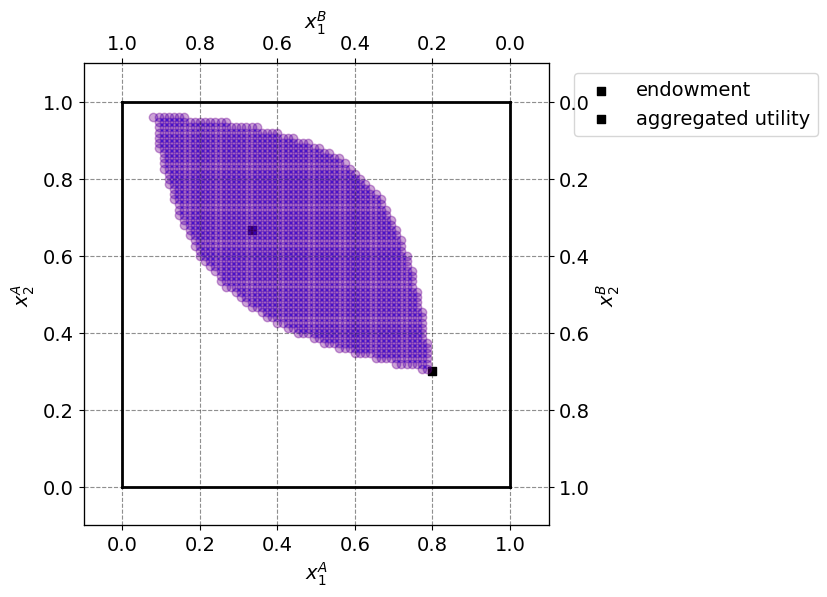

In [285]:
par = model.par

# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=True,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# A
ax_A.scatter(par.w1A,par.w2A,marker='s',color='black',label='endowment')
#just added another point here as aggregated_utility
ax_A.scatter(x1A_optimal,x2A_optimal,marker='s',color='black',label='aggregated utility')

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0));

# Define initial endowments
omegaA1 = par.w1A
omegaA2 = par.w2A
omegaB1 = 1 - par.w1A
omegaB2 = 1 - par.w2A

# Generate grid of points
N = 75
xA1_values = np.linspace(0, 1, N+1)
xA2_values = np.linspace(0, 1, N+1)

# Initialize lists to store valid points
valid_points_A = []
valid_points_B = []

# Check each point
for xA1 in xA1_values:
    for xA2 in xA2_values:
        # Calculate corresponding B goods
        xB1 = 1 - xA1
        xB2 = 1 - xA2
        # Check if point satisfies conditions
        if model.utility_A(xA1, xA2) >= model.utility_A(omegaA1, omegaA2) and model.utility_B(xB1, xB2) >= model.utility_B(omegaB1, omegaB2):
            valid_points_A.append((xA1, xA2))
            valid_points_B.append((xB1, xB2))

# Plot valid points
ax_A.scatter([point[0] for point in valid_points_A], [point[1] for point in valid_points_A], marker='o', color='red', label='Valid points A', alpha=0.2)
#NOT SURE WHAT THIS ax_A purpose is
ax_B.scatter([point[0] for point in valid_points_B], [point[1] for point in valid_points_B], marker='o', color='blue', label='Valid points B', alpha=0.2)


# Question 7

Draw a set W with 50 elements

In [286]:
# Define the number of elements in the set
num_elements = 50
np.random.seed(1657)
# Generate random values for omega1A and omega2A
omega1A_values = np.random.uniform(0, 1, num_elements)
omega2A_values = np.random.uniform(0, 1, num_elements)

# Combine omega1A and omega2A into tuples to form the set W
W = [(omega1A_values[i], omega2A_values[i]) for i in range(num_elements)]

# Print the set W
print("Set W:")
for pair in W:
    print(pair)

Set W:
(0.03718351942671205, 0.4912287736846508)
(0.6168569653089924, 0.6367950024204542)
(0.6406269404363998, 0.6112780382211228)
(0.8573269547351067, 0.9739248412103715)
(0.4616819736824014, 0.5665776679002624)
(0.3812133069163124, 0.8452358269684767)
(0.7731702922130856, 0.1860315420376264)
(0.12156942574361962, 0.0725360793521227)
(0.6033931022242555, 0.09594284046922419)
(0.07178016761169081, 0.5017350175013514)
(0.716349694441655, 0.23572264597007997)
(0.8759132158949587, 0.19287612448766434)
(0.43660969844969155, 0.04670152810296624)
(0.978748605332997, 0.1954707902717897)
(0.9812152360461119, 0.3515322444271103)
(0.8685321486533855, 0.2222059026987705)
(0.35745660503994614, 0.566261151899644)
(0.16310480833068564, 0.5453340483878013)
(0.8741672533092805, 0.00042745667156707245)
(0.4422145176776947, 0.6897808208057735)
(0.6554761632015913, 0.1552880602734119)
(0.3942280121605818, 0.816595356922174)
(0.4060721713298544, 0.824637096391279)
(0.7446022281985852, 0.5620150407146959)


# Question 8

Find the market equilibrium allocation for each ω_A ∈ C and plot them in the Edgeworth box

In [317]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize

list_omega_1 = np.random.rand(50,1)
list_omega_2 = np.random.rand(50,1)

type(list_omega_1)
omega_1_pack= np.ndarray.tolist(list_omega_1)
type(omega_1_pack)

type(list_omega_2)
omega_2_pack = np.ndarray.tolist(list_omega_2)
type(omega_2_pack)

#Defining constraints
constraint_1 = {'type': 'ineq', 'fun': lambda x : model.utility_B_mark(1 - x[0], 1 - x[1]) - model.utility_B_mark(1-w1A, 1-w2A)}
constraint_2 = {'type': 'ineq', 'fun': lambda x : model.utility_A_mark(x[0], x[1]) - model.utility_A_mark(w1A, w2A)}

market_equilibrium = []

print(market_equilibrium)

for w1A_list, w2A_list in zip(omega_1_pack, omega_2_pack):
    for w1A, w2A in zip(w1A_list, w2A_list):
    # Define constraints inside the loop with specific values of w1A and w2A
           x0 = [w1A, w2A]
           market_equilibrium_allocation = minimize(model.utility_aggregate_equilibrium, x0, bounds=[(0, 1), (0, 1)], constraints=[constraint_1,constraint_2])
           market_equilibrium.append(market_equilibrium_allocation.x)
market_equilibrium
    

[]


[array([0.30121073, 0.63289477]),
 array([0.46587761, 0.77722924]),
 array([0.33322609, 0.66565616]),
 array([0.77877729, 0.93368767]),
 array([0.15518376, 0.4242491 ]),
 array([0.40567327, 0.73192532]),
 array([0.17469413, 0.45848964]),
 array([0.11343555, 0.33856657]),
 array([0.33397924, 0.66631385]),
 array([0.05422554, 0.1865251 ]),
 array([0.156208  , 0.42571957]),
 array([0.56752855, 0.83997721]),
 array([0.66844614, 0.88967612]),
 array([0.38351655, 0.71333626]),
 array([0.71030949, 0.90746886]),
 array([0.29110325, 0.62157432]),
 array([0.18062169, 0.46852441]),
 array([0.43506227, 0.75495175]),
 array([0.33300621, 0.66653415]),
 array([0.79245501, 0.93854774]),
 array([0.3329949 , 0.66643969]),
 array([0.82413281, 0.94935236]),
 array([0.03993557, 0.14262805]),
 array([0.56116541, 0.83646959]),
 array([0.15168361, 0.41707989]),
 array([0.67804997, 0.89391832]),
 array([0.21815465, 0.52743278]),
 array([0.45759445, 0.77141566]),
 array([0.50837905, 0.80531612]),
 array([0.1732

Text(0.5, 1.0, 'Market equilibrium allocations for $w^{A}$')

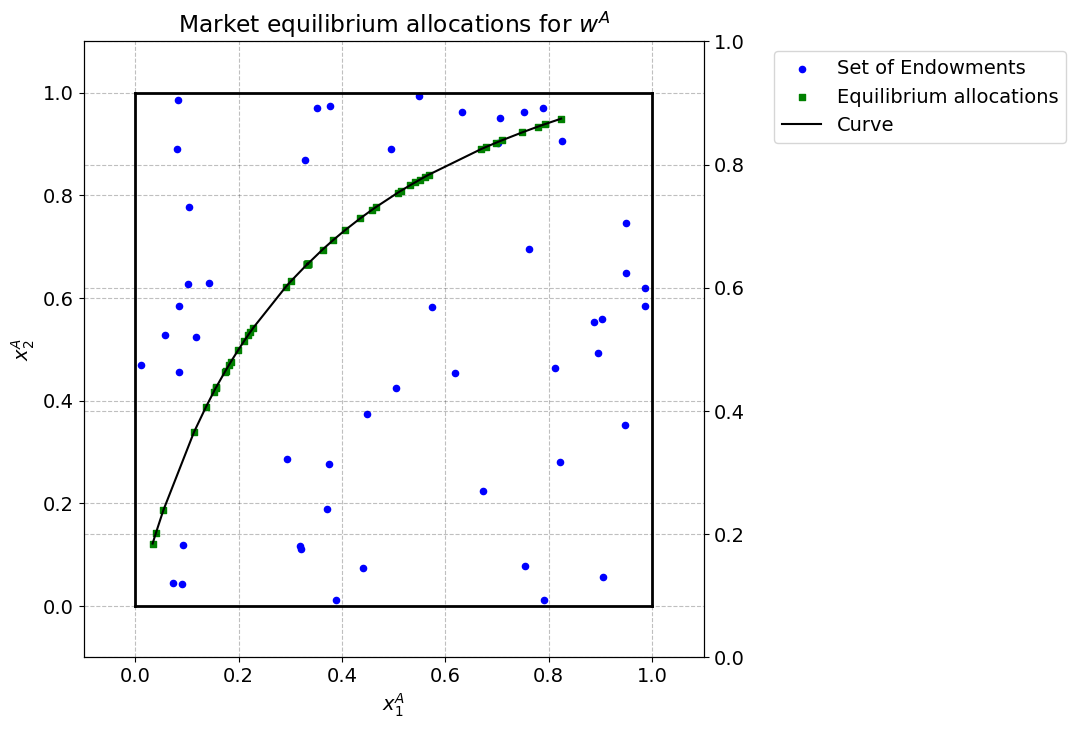

In [320]:
# Plotting the Edgeworth box
fig = plt.figure(frameon=True,figsize=(8,8), dpi=100)
ax_A=fig.add_subplot(1,1,1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")
temp = ax_A.twinx()

# Setting limits in each axes
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')
ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    

#Plotting the set of equilibrium
ax_A.scatter(list_omega_1, list_omega_2, color='blue', label='Set of Endowments', s=20)

#Plotting market equilibrium 
x_values = [point[0] for point in market_equilibrium]
y_values = [point[1] for point in market_equilibrium]
ax_A.scatter(x_values, y_values, color='green', marker='s', s=15, label='Equilibrium allocations')

# Plotting a line curve
sorted_x_values = sorted(x_values)
sorted_y_values = [y for _, y in sorted(zip(x_values, y_values))] 
ax_A.plot(sorted_x_values, sorted_y_values, color='black', label='Curve') 

# Displaying grid lines on the plot
ax_A.grid(True)
ax_A.legend(bbox_to_anchor=(1.8, 1.05))

# Adding a legend
ax_A.legend(frameon=True, loc='upper right', bbox_to_anchor=(1.6,1.0));

# Adding a title
ax_A.set_title('Market equilibrium allocations for $w^{A}$')


ADD CONCISE CONLUSION.